# Digit Recognizer
Identifying the handwritten digits.

In [1]:
# import all required libraries for reading, analysing and visualizing data
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Analysis

In [2]:
# read the data from the train and test csv files
train_df = pd.read_csv('../../../Large Datasets/digitRecog/train.csv')
test_df = pd.read_csv('../../../Large Datasets/digitRecog/test.csv')

In [3]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
print('Training dataset shape: ', train_df.shape)
print('Testing dataset shape: ', test_df.shape)

Training dataset shape:  (42000, 785)
Testing dataset shape:  (28000, 784)


In [5]:
# check for null values
train_df.isnull().any().describe()

count       785
unique        1
top       False
freq        785
dtype: object

In [6]:
# check for null values
test_df.isnull().any().describe()

count       784
unique        1
top       False
freq        784
dtype: object

In [7]:
(Y, X) = (train_df['label'], train_df.drop(['label'], axis = 1))

## Data Visualization

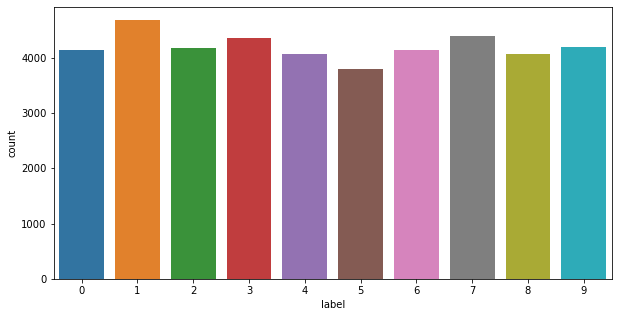

In [8]:
plt.figure(figsize = [10, 5])
sns.countplot(Y);

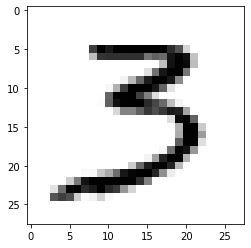

In [9]:
# see any image of the dataset
i = 25
img = X.values[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray');

## Preprocessing of data

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
# split into training and validation set
(X_train, X_val, Y_train, Y_val) = train_test_split(X.values, Y.values, test_size=0.3)

# Reshape the datasets
Y_train = Y_train.reshape(X_train.shape[0], 1)
Y_val = Y_val.reshape(X_val.shape[0], 1)

# Explore the dataset
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_val shape:" + str(X_val.shape))
print("Y_val shape:" + str(Y_val.shape))

X_train shape:(29400, 784)
Y_train shape:(29400, 1)
X_val shape:(12600, 784)
Y_val shape:(12600, 1)


In [12]:
# normalize the xalues
X_train = X_train/255.0
X_val = X_val/255.0

## Deep Neural Network using Keras

In [13]:
from keras.models import Sequential
from keras.layers import Input, Dense

In [14]:
# define the model
model = Sequential()
model.add(Input(shape = (784, )))
model.add(Dense(35, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [15]:
# summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35)                27475     
_________________________________________________________________
dense_1 (Dense)              (None, 20)                720       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                210       
Total params: 28,405
Trainable params: 28,405
Non-trainable params: 0
_________________________________________________________________


In [16]:
# compile the model
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [17]:
history = model.fit(X_train, Y_train, epochs = 25, batch_size = 512, validation_split = 0.2)

Epoch 1/25
46/46 [==============================] - 1s 14ms/step - loss: 1.4890 - accuracy: 0.5784 - val_loss: 0.7855 - val_accuracy: 0.8189
Epoch 2/25
46/46 [==============================] - 0s 6ms/step - loss: 0.5637 - accuracy: 0.8579 - val_loss: 0.4272 - val_accuracy: 0.8891
Epoch 3/25
46/46 [==============================] - 0s 5ms/step - loss: 0.3907 - accuracy: 0.8926 - val_loss: 0.3449 - val_accuracy: 0.9022
Epoch 4/25
46/46 [==============================] - 0s 5ms/step - loss: 0.3348 - accuracy: 0.9062 - val_loss: 0.3063 - val_accuracy: 0.9119
Epoch 5/25
46/46 [==============================] - 0s 5ms/step - loss: 0.3044 - accuracy: 0.9146 - val_loss: 0.2838 - val_accuracy: 0.9202
Epoch 6/25
46/46 [==============================] - 0s 5ms/step - loss: 0.2814 - accuracy: 0.9197 - val_loss: 0.2663 - val_accuracy: 0.9245
Epoch 7/25
46/46 [==============================] - 0s 5ms/step - loss: 0.2626 - accuracy: 0.9256 - val_loss: 0.2548 - val_accuracy: 0.9279
Epoch 8/25
46/46 [=

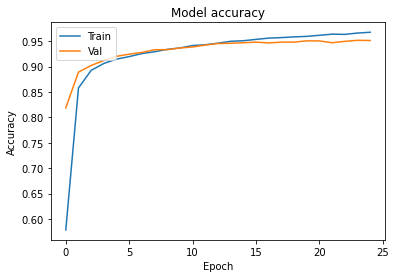

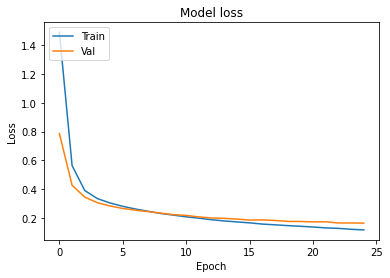

In [18]:
# plot training and validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

# plot training and validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Val'], loc = 'upper left')
plt.show()

In [19]:
# find the accuracy on train and validation set
train_loss, train_acc = model.evaluate(X_train, Y_train)
val_loss, val_acc = model.evaluate(X_val, Y_val)
print("Accuracy on train set is %f" %(train_acc * 100)  + "%")
print("Accuracy on validation set is %f" %(val_acc * 100)  + "%")

394/394 [==============================] - 0s 948us/step - loss: 0.1848 - accuracy: 0.9458
Accuracy on train set is 96.595240%
Accuracy on validation set is 94.579363%


## Using Sklearn

In [20]:
# import the required modules
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [21]:
svm_cl = SVC(gamma=0.001)
svm_cl.fit(X_train, Y_train)

# train score
svm_train_score = round(svm_cl.score(X_train, Y_train) * 100, 2)
svm_val_score = round(svm_cl.score(X_val, Y_val) * 100, 2)
# predicted output
Y_pred_svm = svm_cl.predict(X_val)

print('SVM train score: ', svm_train_score)
print('SVM validation score: ', svm_val_score)
print('Classification Report: \n', classification_report(Y_val, Y_pred_svm))
print('Confusion Matrix:\n', confusion_matrix(Y_val, Y_pred_svm))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVM train score:  93.28
SVM validation score:  92.92
Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.97      0.97      1243
           1       0.94      0.98      0.96      1402
           2       0.92      0.92      0.92      1148
           3       0.92      0.89      0.90      1328
           4       0.91      0.94      0.93      1283
           5       0.89      0.91      0.90      1115
           6       0.96      0.96      0.96      1243
           7       0.95      0.93      0.94      1324
           8       0.92      0.90      0.91      1230
           9       0.92      0.89      0.91      1284

    accuracy                           0.93     12600
   macro avg       0.93      0.93      0.93     12600
weighted avg       0.93      0.93      0.93     12600

Confusion Matrix:
 [[1208    0    6    3    3    7    6    0    9    1]
 [   0 1372    8    8    3    3    0    3    2    3]
 [   6    3 1061    5   20    9   10  

## Generate and write the outputs to the csv file

In [22]:
X_test = test_df.values
Y_test = model.predict_classes(X_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


The model predicted it as: 2


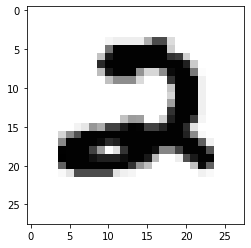

In [23]:
# check the predictions
i = 0
img = X_test[i, :]
img = img.reshape(28, 28)
plt.imshow(255-img, cmap='gray')

print("The model predicted it as: %i" %Y_test[i])

In [24]:
ids = np.array([i + 1 for i in range(X_test.shape[0])])
ans = {'ImageId': ids, 'Label': Y_test}

In [25]:
df = pd.DataFrame(ans)

In [26]:
df.to_csv('output.csv', index = False)